In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

def visualize_encoder_output(encoder_output):
    """
    可视化视觉编码器的输出
    :param encoder_output: 视觉编码器的输出 (e.g., feature map or embedding vector)
    """
    if len(encoder_output.shape) == 4:  # Feature map (B, C, H, W)
        feature_map = encoder_output[0]  # 取第一个样本
        num_channels = feature_map.shape[0]
        plt.figure(figsize=(15, 15))
        for i in range(min(num_channels, 16)):  # 可视化前16个通道
            plt.subplot(4, 4, i + 1)
            plt.imshow(feature_map[i].detach().cpu().numpy(), cmap='viridis')
            plt.axis('off')
        plt.show()
    elif len(encoder_output.shape) == 2:  # Embedding vector (B, D)
        pca = PCA(n_components=2)
        reduced = pca.fit_transform(encoder_output.detach().cpu().numpy())
        plt.scatter(reduced[:, 0], reduced[:, 1], c='blue', alpha=0.5)
        plt.title("PCA of Encoder Output")
        plt.show()
def visualize_trajectory(trajectory):
    """
    可视化策略输出的轨迹
    :param trajectory: 策略输出的轨迹 (T, 3) 或 (T, N)
    """
    trajectory = np.array(trajectory)
    if trajectory.shape[1] == 3:  # 3D 轨迹
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], label='Trajectory')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.legend()
        plt.show()
    else:  # 多维度轨迹
        plt.figure()
        for i in range(trajectory.shape[1]):
            plt.plot(trajectory[:, i], label=f'Dimension {i}')
        plt.xlabel('Time Step')
        plt.ylabel('Value')
        plt.legend()
        plt.show()


In [10]:
# 可视化这个文件夹的下面的所有点云,以图片形式显示
import glob
import os
import open3d as o3d

def visualize_and_save_point_clouds(folder_path, output_folder):
    """
    可视化文件夹中的所有点云文件并保存为图片
    :param folder_path: 包含点云文件的文件夹路径
    :param output_folder: 保存图片的文件夹路径
    """
    # 确保输出文件夹存在
    os.makedirs(output_folder, exist_ok=True)

    # 获取所有点云文件
    point_cloud_files = glob.glob(os.path.join(folder_path, '*.ply'))
    for file in point_cloud_files:
        # 读取点云数据
        pcd = o3d.io.read_point_cloud(file)
        print(f"Loaded point cloud from {file}, points: {len(pcd.points)}")

        # 使用 VisualizerWithOffScreen 进行渲染
        vis = o3d.visualization.VisualizerWithOffScreen()
        vis.create_window(visible=False)  # 创建一个不可见窗口
        vis.add_geometry(pcd)

        # 渲染并保存图片
        vis.poll_events()
        vis.update_renderer()
        output_image_path = os.path.join(output_folder, os.path.basename(file).replace('.ply', '.png'))
        vis.capture_screen_image(output_image_path)
        vis.destroy_window()

        print(f"Saved point cloud visualization to {output_image_path}")

folder_path = "/home/jdh/Projects/Robotics/3D-Diffusion-Policy/3D-Diffusion-Policy/data/outputs/metaworld_window-close-dp3-baseline_dp_window-close_seed0/videos/window-close_20_pc"
output_folder = "/home/jdh/Projects/Robotics/3D-Diffusion-Policy/3D-Diffusion-Policy/data/outputs/metaworld_window-close-dp3-baseline_dp_window-close_seed0/videos/window-close_20_pc/images"
visualize_and_save_point_clouds(folder_path, output_folder)

Loaded point cloud from /home/jdh/Projects/Robotics/3D-Diffusion-Policy/3D-Diffusion-Policy/data/outputs/metaworld_window-close-dp3-baseline_dp_window-close_seed0/videos/window-close_20_pc/1146.ply, points: 512


AttributeError: module 'open3d.visualization' has no attribute 'VisualizerWithOffScreen'

Shape of agent_poses before reshape: (200, 9)
Shape of agent_poses after reshape: (200, 9)


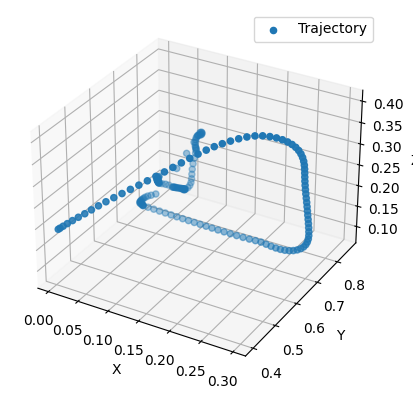

Shape of agent_poses before reshape: (200, 9)
Shape of agent_poses after reshape: (200, 9)
Shape of agent_poses before reshape: (200, 9)
Shape of agent_poses after reshape: (200, 9)
Shape of agent_poses before reshape: (200, 9)
Shape of agent_poses after reshape: (200, 9)
Shape of agent_poses before reshape: (200, 9)
Shape of agent_poses after reshape: (200, 9)
Shape of agent_poses before reshape: (200, 9)
Shape of agent_poses after reshape: (200, 9)
Shape of agent_poses before reshape: (200, 9)
Shape of agent_poses after reshape: (200, 9)
Shape of agent_poses before reshape: (200, 9)
Shape of agent_poses after reshape: (200, 9)


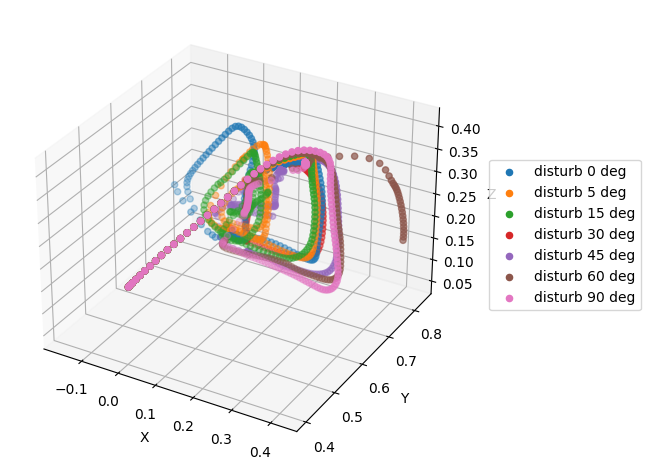

In [27]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
disturbs=[0,5,15,30,45,60,90]
data_path = "/home/jdh/Projects/Robotics/3D-Diffusion-Policy/3D-Diffusion-Policy/data/outputs/metaworld_window-close-dp3-baseline_dp_window-close_seed0/videos/window-close_45_agent_poses.pkl"

with open(data_path, 'rb') as f:
    data = pickle.load(f)
    # print("Loaded data:", data)

    # Assuming the data is a list of positions
    agent_poses = np.array(data[200:400])
    print("Shape of agent_poses before reshape:", agent_poses.shape)
    
    # Reshape if necessary
    if agent_poses.ndim == 1:
        agent_poses = agent_poses.reshape(-1, 3)  # Reshape to (T, 3)
    print("Shape of agent_poses after reshape:", agent_poses.shape)

    # Visualize trajectory
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(agent_poses[:, 0], agent_poses[:, 1], agent_poses[:, 2], label='Trajectory')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.show()

# Visualize each disturb, draw them to the same figure   
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for dis in disturbs:
    data_path = f"/home/jdh/Projects/Robotics/3D-Diffusion-Policy/3D-Diffusion-Policy/data/outputs/metaworld_window-close-dp3-baseline_dp_window-close_seed0/videos/window-close_{dis}_agent_poses.pkl"
    with open(data_path, 'rb') as f:
        data = pickle.load(f)
        # print("Loaded data:", data)

        # Assuming the data is a list of positions
        agent_poses = np.array(data[:200])
        print("Shape of agent_poses before reshape:", agent_poses.shape)
        
        # Reshape if necessary
        if agent_poses.ndim == 1:
            agent_poses = agent_poses.reshape(-1, 3)  # Reshape to (T, 3)
        print("Shape of agent_poses after reshape:", agent_poses.shape)
        
        # Visualize trajectory
        ax.scatter(agent_poses[:, 0], agent_poses[:, 1], agent_poses[:, 2], label=f'disturb {dis} deg')

# 添加图例
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))  # 图例放在图的右侧
plt.tight_layout()  # 自动调整布局，避免图像被裁剪
plt.show()

In [2]:
# /home/jdh/Projects/Robotics/3D-Diffusion-Policy/third_party/Metaworld/metaworld/envs/assets_v2/objects/meshes/xyz_base/l3.stl
# visualize the stl
import open3d as o3d
import os
import numpy as np
import matplotlib.pyplot as plt
import trimesh
import pyrender

stl=f"/home/jdh/Projects/Robotics/3D-Diffusion-Policy/third_party/Metaworld/metaworld/envs/assets_v2/objects/meshes/xyz_base/l4.stl"
mesh = trimesh.load_mesh(stl)
mesh.show()
# 



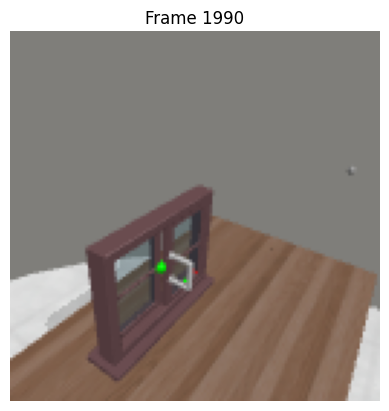

In [1]:
import zarr
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# 路径
zarr_path = "/home/jdh/Projects/Robotics/3D-Diffusion-Policy/3D-Diffusion-Policy/data/metaworld_window-close_expert_invis.zarr"
img_group = "data/img"

# 读取 zarr
z = zarr.open(zarr_path, mode='r')
# print(z['img'])
# print(z[0].keys())
print(z.tree())
imgs = z[img_group][:]  # shape: (T, H, W, C) 或 (N, T, H, W, C)

# 如果有 episode 维度，取第一个 episode
if imgs.ndim == 5:
    imgs = imgs[0]

print("视频帧数:", imgs.shape[0])

frame_step = 10  # 每隔 2 帧显示一帧
playback_speed = 0.00  # 控制播放速度（秒）

for i in range(0, imgs.shape[0], frame_step):
    plt.imshow(imgs[i])
    plt.axis('off')
    plt.title(f"Frame {i}")
    display(plt.gcf())
    clear_output(wait=True)
    time.sleep(playback_speed)  # 控制播放速度
    plt.close()